In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



In [ ]:
import pandas as pd

df = pd.read_csv("student_performance_noisy_for_training.csv")

In [ ]:
df["Student_ID"] = ["S" + str(i).zfill(4) for i in range(1, len(df) + 1)]


In [ ]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')

# EDA

In [ ]:
df.isna().sum()

,0
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,47102.0,20.684763,2.905336,17.0,19.000000,21.000000,22.000000,62.455581
Study_Hours_per_Week,47102.0,22.327681,12.424460,0.0,13.563037,21.813980,30.153841,76.638257
Online_Courses_Completed,47102.0,6.548004,2.792361,0.0,5.000000,6.000000,8.000000,43.358027
Assignment_Completion_Rate (%),47102.0,71.553463,17.466401,0.0,62.945125,73.422938,83.284646,100.000000
Exam_Score (%),47102.0,67.150107,16.908520,0.0,58.069345,68.350125,78.343178,100.000000
Attendance_Rate (%),47102.0,75.083054,14.756922,50.0,62.000000,75.000000,88.000000,100.000000
Self_Reported_Stress_Level,47102.0,3.127264,1.250872,1.0,3.000000,3.000000,4.000000,24.716914
Time_Spent_on_Social_Media (hours/week),47102.0,12.604030,8.656340,1.0,6.200000,10.600000,16.900000,55.000000
Sleep_Hours_per_Night,47102.0,6.982952,1.994607,4.0,5.000000,7.000000,9.000000,10.000000


In [ ]:
df['Age'].describe()

,Age
count,47102.000000
mean,20.684763
std,2.905336
min,17.000000
25%,19.000000
50%,21.000000
75%,22.000000
max,62.455581


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,24034
Male,23068


In [ ]:
df['Study_Hours_per_Week'].describe()

,Study_Hours_per_Week
count,47102.000000
mean,22.327681
std,12.424460
min,0.000000
25%,13.563037
50%,21.813980
75%,30.153841
max,76.638257


In [ ]:
df['Preferred_Learning_Style'].value_counts()

,count
Preferred_Learning_Style,
Visual,19826
Auditory,11673
Reading/Writing,9508
Kinesthetic,6095


In [ ]:
df['Online_Courses_Completed'].describe()

,Online_Courses_Completed
count,47102.000000
mean,6.548004
std,2.792361
min,0.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,43.358027


In [ ]:
df['Participation_in_Discussions'].describe()

,Participation_in_Discussions
count,47102
unique,2
top,Yes
freq,32856


In [ ]:
df['Participation_in_Discussions'].value_counts()

,count
Participation_in_Discussions,
Yes,32856
No,14246


In [ ]:
df['Assignment_Completion_Rate (%)'].describe()

,Assignment_Completion_Rate (%)
count,47102.000000
mean,71.553463
std,17.466401
min,0.000000
25%,62.945125
50%,73.422938
75%,83.284646
max,100.000000


In [ ]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')

In [ ]:
df['Exam_Score (%)'].describe()

,Exam_Score (%)
count,47102.000000
mean,67.150107
std,16.908520
min,0.000000
25%,58.069345
50%,68.350125
75%,78.343178
max,100.000000


In [ ]:
df['Attendance_Rate (%)'].describe()

,Attendance_Rate (%)
count,47102.000000
mean,75.083054
std,14.756922
min,50.000000
25%,62.000000
50%,75.000000
75%,88.000000
max,100.000000


In [ ]:
df['Use_of_Educational_Tech'].value_counts()

,count
Use_of_Educational_Tech,
Yes,35354
No,11748


In [ ]:
df['Self_Reported_Stress_Level'].describe()

,Self_Reported_Stress_Level
count,47102.000000
mean,3.127264
std,1.250872
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,24.716914


In [ ]:
df['Self_Reported_Stress_Level'].value_counts()

,count
Self_Reported_Stress_Level,
3.000000,21150
4.000000,10193
2.000000,8102
5.000000,4262
1.000000,3241
14.830149,73
9.886766,30
19.773532,28
24.716914,14


In [ ]:
df['Time_Spent_on_Social_Media (hours/week)'].describe()

,Time_Spent_on_Social_Media (hours/week)
count,47102.00000
mean,12.60403
std,8.65634
min,1.00000
25%,6.20000
50%,10.60000
75%,16.90000
max,55.00000


In [ ]:
df['Sleep_Hours_per_Night'].describe()

,Sleep_Hours_per_Night
count,47102.000000
mean,6.982952
std,1.994607
min,4.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,10.000000


In [ ]:
df['Final_Grade'].value_counts()

,count
Final_Grade,
C,19763
B,19322
D,3346
A,2775
F,1896


In [ ]:
 df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47102 entries, 0 to 47101
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Student_ID                               47102 non-null  object 
 1   Age                                      47102 non-null  float64
 2   Gender                                   47102 non-null  object 
 3   Study_Hours_per_Week                     47102 non-null  float64
 4   Preferred_Learning_Style                 47102 non-null  object 
 5   Online_Courses_Completed                 47102 non-null  float64
 6   Participation_in_Discussions             47102 non-null  object 
 7   Assignment_Completion_Rate (%)           47102 non-null  float64
 8   Exam_Score (%)                           47102 non-null  float64
 9   Attendance_Rate (%)                      47102 non-null  float64
 10  Use_of_Educational_Tech                  47102

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-57-4096567695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_counts.index,y= grade_counts.values, palette='viridis')


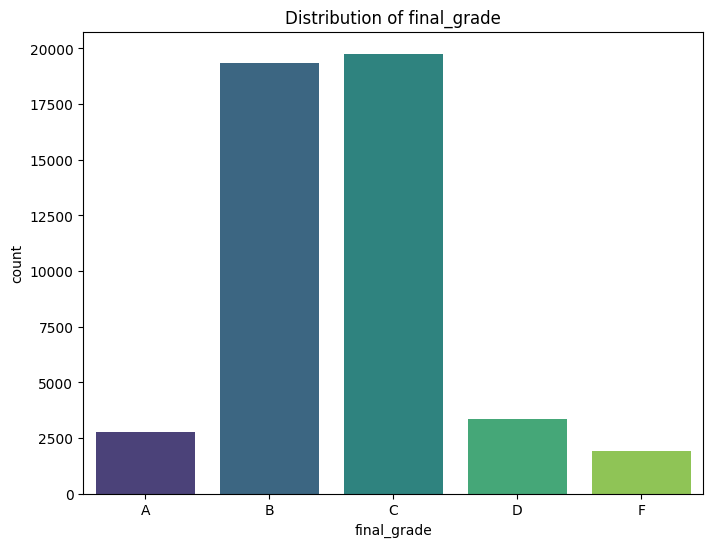

In [ ]:
grade_counts =df['Final_Grade'].value_counts().sort_index()
plt.figure(figsize=(8,6))
sns.barplot(x=grade_counts.index,y= grade_counts.values, palette='viridis')
plt.xlabel('final_grade')
plt.ylabel('count')
plt.title('Distribution of final_grade')
plt.show()



In [ ]:
numeric_columns = [
    'Study_Hours_per_Week',
    'Online_Courses_Completed',
    'Assignment_Completion_Rate (%)',
    'Exam_Score (%)',
    'Attendance_Rate (%)',
    'Time_Spent_on_Social_Media (hours/week)',
    'Sleep_Hours_per_Night'
]

In [ ]:
df['Online_Courses_Completed'].describe()

,Online_Courses_Completed
count,47102.000000
mean,6.548004
std,2.792361
min,0.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,43.358027


In [ ]:
online_q= df['Online_Courses_Completed'].quantile([0.01, 0.05, 0.25, 0.5, 0.75,0.80,0.90, 0.95, 0.99,1.0])
online_q

,Online_Courses_Completed
0.01,1.000000
0.05,2.000000
0.25,5.000000
0.50,6.000000
0.75,8.000000
0.80,9.000000
0.90,10.000000
0.95,11.000000
0.99,13.000000
1.00,43.358027


In [ ]:
df['Online_Courses_Completed'].value_counts().sort_index()

,count
Online_Courses_Completed,
0.000000,133
1.000000,744
2.000000,1959
3.000000,3273
3.335233,2
4.000000,4845
5.000000,6179
6.000000,6821
6.670466,9


In [ ]:
# df['Online_Courses_Completed']=df['Online_Courses_Completed'].astype(INT64)
df['Online_Courses_Completed'] = df['Online_Courses_Completed'].apply(lambda x: int(x) if pd.notnull(x) else pd.NA)


In [ ]:
study_h= df['Study_Hours_per_Week'].quantile([0.01, 0.05, 0.25, 0.5, 0.75,0.80,0.90, 0.95, 0.99,1.0])

study_h

,Study_Hours_per_Week
0.01,0.000000
0.05,2.232943
0.25,13.563037
0.50,21.813980
0.75,30.153841
0.80,32.249795
0.90,37.951035
0.95,43.713457
0.99,56.741084
1.00,76.638257


In [ ]:
df['Study_Hours_per_Week'].value_counts().sort_index()

,count
Study_Hours_per_Week,
0.000000,1514
0.001463,1
0.004771,1
0.006690,1
0.007024,1
...,...
75.983091,1
76.277798,1
76.482213,1


In [ ]:
df['Study_Hours_per_Week'] = df['Study_Hours_per_Week'].apply(lambda x: int(x) if pd.notnull(x) else pd.NA)


In [ ]:
above_100 = df[df['Study_Hours_per_Week'] > 100]
above_100

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
df['Assignment_Completion_Rate (%)'].value_counts()


,count
Assignment_Completion_Rate (%),
100.000000,1268
0.000000,157
49.664613,1
66.806147,1
64.736766,1
...,...
80.012934,1
42.569017,1
90.872454,1


In [ ]:
above_100 = df[df['Assignment_Completion_Rate (%)'] > 100]
above_100

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
df['Exam_Score (%)'].value_counts().sort_index()

,count
Exam_Score (%),
0.000000,141
0.113171,1
0.140899,1
0.222921,1
0.224913,1
...,...
99.972891,1
99.977447,1
99.980442,1


In [ ]:
above_100 = df[df['Exam_Score (%)'] > 100]
above_100

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
above_100 = df[(df['Attendance_Rate (%)'] > 100) | (df['Exam_Score (%)'] > 100) | (df['Assignment_Completion_Rate (%)'] > 100)]
above_100

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
df['Time_Spent_on_Social_Media (hours/week)'].quantile([0.01, 0.05, 0.25, 0.5, 0.75,0.80,0.90, 0.95, 0.99,1.0])

,Time_Spent_on_Social_Media (hours/week)
0.01,1.000
0.05,2.400
0.25,6.200
0.50,10.600
0.75,16.900
0.80,18.800
0.90,24.300
0.95,29.600
0.99,40.799
1.00,55.000


In [ ]:
df['Time_Spent_on_Social_Media (hours/week)'] = df['Time_Spent_on_Social_Media (hours/week)'].astype(int)

In [ ]:
df['Time_Spent_on_Social_Media (hours/week)'].value_counts().sort_index()

,count
Time_Spent_on_Social_Media (hours/week),
1,1595
2,1819
3,2288
4,2689
5,2716
6,2762
7,2753
8,2664
9,2557


In [ ]:
df[df['Time_Spent_on_Social_Media (hours/week)']>50]

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
565,S0566,22.0,Female,26,Auditory,11,Yes,90.411188,79.806133,72.0,Yes,5.0,55,7.0,B
1159,S1160,19.0,Female,44,Kinesthetic,8,Yes,92.460759,74.115760,83.0,Yes,3.0,54,6.0,B
3172,S3173,20.0,Male,28,Visual,7,No,95.928043,79.582555,97.0,Yes,3.0,55,4.0,B
3310,S3311,22.0,Female,26,Reading/Writing,9,No,94.056241,83.953486,83.0,No,3.0,55,7.0,B
5236,S5237,21.0,Male,46,Visual,4,No,89.007338,70.830772,84.0,No,3.0,55,10.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44498,S44499,20.0,Female,24,Reading/Writing,10,Yes,68.091782,66.426048,88.0,Yes,2.0,52,7.0,C
45239,S45240,25.0,Male,25,Reading/Writing,5,Yes,85.002019,93.852155,50.0,No,3.0,55,10.0,B
46271,S46272,24.0,Female,5,Visual,7,Yes,81.432554,50.052285,52.0,Yes,5.0,55,10.0,C
46732,S46733,20.0,Female,22,Visual,5,No,82.518726,86.998004,93.0,Yes,3.0,53,8.0,B


In [ ]:
# Sleep_Hours_per_Night
df['Sleep_Hours_per_Night'].quantile([0.01, 0.05, 0.25, 0.5, 0.75,0.80,0.90, 0.95, 0.99,1.0])


,Sleep_Hours_per_Night
0.01,4.0
0.05,4.0
0.25,5.0
0.50,7.0
0.75,9.0
0.80,9.0
0.90,10.0
0.95,10.0
0.99,10.0
1.00,10.0


In [ ]:
df['Sleep_Hours_per_Night'] = df['Sleep_Hours_per_Night'].apply(lambda x: int(x) if pd.notnull(x) else pd.NA)

In [ ]:
df[df['Sleep_Hours_per_Night']>12]

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
def analyze_numeric_column(df, column_name, threshold=50):
    print(f"\n Quantiles for: {column_name}")
    print(df[column_name].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.99, 1.0]))

    df[column_name] = df[column_name].apply(lambda x: int(x) if pd.notnull(x) else x)

    print(f"\n Value Counts for: {column_name}")
    print(df[column_name].value_counts().sort_index())

    print(f"\n Values > {threshold} in {column_name}")
    display(df[df[column_name] > threshold])


In [ ]:
analyze_numeric_column(df, 'Sleep_Hours_per_Night', threshold=12)



 Quantiles for: Sleep_Hours_per_Night
0.01     4.0
0.05     4.0
0.25     5.0
0.50     7.0
0.75     9.0
0.80     9.0
0.90    10.0
0.95    10.0
0.99    10.0
1.00    10.0
Name: Sleep_Hours_per_Night, dtype: float64

 Value Counts for: Sleep_Hours_per_Night
Sleep_Hours_per_Night
4     6749
5     6861
6     6638
7     6798
8     6948
9     6468
10    6640
Name: count, dtype: int64

 Values > 12 in Sleep_Hours_per_Night


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
analyze_numeric_column(df, 'Study_Hours_per_Week', threshold=80)



 Quantiles for: Study_Hours_per_Week
0.01     0.0
0.05     2.0
0.25    13.0
0.50    21.0
0.75    30.0
0.80    32.0
0.90    37.0
0.95    43.0
0.99    56.0
1.00    76.0
Name: Study_Hours_per_Week, dtype: float64

 Value Counts for: Study_Hours_per_Week
Study_Hours_per_Week
0     1852
1      396
2      444
3      544
4      524
      ... 
72      10
73       9
74       5
75       3
76       4
Name: count, Length: 77, dtype: int64

 Values > 80 in Study_Hours_per_Week


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
analyze_numeric_column(df, 'Online_Courses_Completed', threshold=10)



 Quantiles for: Online_Courses_Completed
0.01     1.0
0.05     2.0
0.25     5.0
0.50     6.0
0.75     8.0
0.80     9.0
0.90    10.0
0.95    11.0
0.99    13.0
1.00    43.0
Name: Online_Courses_Completed, dtype: float64

 Value Counts for: Online_Courses_Completed
Online_Courses_Completed
0      133
1      744
2     1959
3     3275
4     4845
5     6179
6     6830
7     6721
8     5786
9     4505
10    2742
11    1689
12     890
13     439
14     168
15      58
16      43
17       7
18       1
19       1
20      22
23      17
26      17
30      12
33      12
36       4
40       1
43       2
Name: count, dtype: int64

 Values > 10 in Online_Courses_Completed


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
9,S0010,22.00000,Male,24,Visual,11,Yes,89.673978,88.340480,100.0,Yes,4.0,1,9,B
24,S0025,21.00000,Female,32,Visual,11,Yes,76.665664,70.887381,50.0,Yes,1.0,18,10,B
42,S0043,17.00000,Male,25,Auditory,11,Yes,58.490774,52.171824,58.0,No,3.0,5,8,C
67,S0068,24.00000,Male,26,Reading/Writing,13,Yes,79.676134,87.517149,72.0,Yes,2.0,19,5,B
144,S0145,18.00000,Female,24,Kinesthetic,13,Yes,76.983580,55.888926,51.0,No,2.0,5,10,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47064,S47065,52.84703,Male,23,Visual,11,No,80.648011,76.257491,78.0,Yes,2.0,2,8,B
47072,S47073,18.00000,Male,25,Auditory,30,Yes,78.684937,81.500735,67.0,Yes,1.0,5,8,A
47083,S47084,18.00000,Female,30,Visual,13,No,85.240453,72.769241,93.0,No,3.0,11,5,B
47095,S47096,17.00000,Male,2,Kinesthetic,12,Yes,59.175361,46.105998,92.0,Yes,3.0,19,8,D


In [ ]:
analyze_numeric_column(df, 'Assignment_Completion_Rate (%)', threshold=100)



 Quantiles for: Assignment_Completion_Rate (%)
0.01      8.978941
0.05     40.249529
0.25     62.945125
0.50     73.422938
0.75     83.284646
0.80     85.674222
0.90     91.564444
0.95     96.236021
0.99    100.000000
1.00    100.000000
Name: Assignment_Completion_Rate (%), dtype: float64

 Value Counts for: Assignment_Completion_Rate (%)
Assignment_Completion_Rate (%)
0       177
1        30
2        35
3        35
4        32
       ... 
96      364
97      307
98      270
99      234
100    1268
Name: count, Length: 101, dtype: int64

 Values > 100 in Assignment_Completion_Rate (%)


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
analyze_numeric_column(df, 'Exam_Score (%)', threshold=100)



 Quantiles for: Exam_Score (%)
0.01     10.368481
0.05     38.217793
0.25     58.069345
0.50     68.350125
0.75     78.343178
0.80     80.817998
0.90     87.127496
0.95     92.313446
0.99    100.000000
1.00    100.000000
Name: Exam_Score (%), dtype: float64

 Value Counts for: Exam_Score (%)
Exam_Score (%)
0      164
1       19
2       21
3       33
4       33
      ... 
96     201
97     180
98     145
99     139
100    676
Name: count, Length: 101, dtype: int64

 Values > 100 in Exam_Score (%)


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
analyze_numeric_column(df, 'Attendance_Rate (%)', threshold=100)



 Quantiles for: Attendance_Rate (%)
0.01     50.0
0.05     52.0
0.25     62.0
0.50     75.0
0.75     88.0
0.80     90.0
0.90     96.0
0.95     98.0
0.99    100.0
1.00    100.0
Name: Attendance_Rate (%), dtype: float64

 Value Counts for: Attendance_Rate (%)
Attendance_Rate (%)
50      872
51      962
52      961
53      951
54      961
55      809
56      968
57      859
58      875
59      995
60      902
61      855
62      965
63      954
64      980
65      914
66      835
67      995
68      990
69      896
70      844
71      872
72      829
73      923
74      951
75      847
76     1020
77      885
78      917
79     1001
80      960
81      986
82      911
83      878
84      928
85      970
86      860
87      907
88      865
89     1013
90      830
91      921
92      908
93      933
94      917
95      897
96      957
97     1013
98     1088
99      950
100     822
Name: count, dtype: int64

 Values > 100 in Attendance_Rate (%)


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [ ]:
analyze_numeric_column(df, 'Time_Spent_on_Social_Media (hours/week)', threshold=50)



 Quantiles for: Time_Spent_on_Social_Media (hours/week)
0.01     1.0
0.05     2.0
0.25     6.0
0.50    10.0
0.75    16.0
0.80    18.0
0.90    24.0
0.95    29.0
0.99    40.0
1.00    55.0
Name: Time_Spent_on_Social_Media (hours/week), dtype: float64

 Value Counts for: Time_Spent_on_Social_Media (hours/week)
Time_Spent_on_Social_Media (hours/week)
1     1595
2     1819
3     2288
4     2689
5     2716
6     2762
7     2753
8     2664
9     2557
10    2407
11    2194
12    2023
13    2021
14    1802
15    1617
16    1443
17    1348
18    1195
19    1067
20     947
21     851
22     785
23     664
24     611
25     501
26     456
27     421
28     369
29     289
30     291
31     271
32     213
33     183
34     191
35     136
36     134
37     102
38     100
39      80
40      90
41      56
42      51
43      48
44      32
45      26
46      38
47      31
48      25
49      18
50      23
51      14
52      19
53       9
54       9
55      58
Name: count, dtype: int64

 Values > 50 in Tim

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
565,S0566,22.0,Female,26,Auditory,11,Yes,90,79,72,Yes,5.0,55,7,B
1159,S1160,19.0,Female,44,Kinesthetic,8,Yes,92,74,83,Yes,3.0,54,6,B
3172,S3173,20.0,Male,28,Visual,7,No,95,79,97,Yes,3.0,55,4,B
3310,S3311,22.0,Female,26,Reading/Writing,9,No,94,83,83,No,3.0,55,7,B
5236,S5237,21.0,Male,46,Visual,4,No,89,70,84,No,3.0,55,10,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44498,S44499,20.0,Female,24,Reading/Writing,10,Yes,68,66,88,Yes,2.0,52,7,C
45239,S45240,25.0,Male,25,Reading/Writing,5,Yes,85,93,50,No,3.0,55,10,B
46271,S46272,24.0,Female,5,Visual,7,Yes,81,50,52,Yes,5.0,55,10,C
46732,S46733,20.0,Female,22,Visual,5,No,82,86,93,Yes,3.0,53,8,B


In [ ]:
analyze_numeric_column(df, 'Sleep_Hours_per_Night', threshold=12)



 Quantiles for: Sleep_Hours_per_Night
0.01     4.0
0.05     4.0
0.25     5.0
0.50     7.0
0.75     9.0
0.80     9.0
0.90    10.0
0.95    10.0
0.99    10.0
1.00    10.0
Name: Sleep_Hours_per_Night, dtype: float64

 Value Counts for: Sleep_Hours_per_Night
Sleep_Hours_per_Night
4     6749
5     6861
6     6638
7     6798
8     6948
9     6468
10    6640
Name: count, dtype: int64

 Values > 12 in Sleep_Hours_per_Night


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


Categorical columns


In [ ]:
def analyze_categorical_column(df, column_name):
    print(f"\n Value Counts for: {column_name}")
    print(df[column_name].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
    plt.title(f"Distribution of {column_name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



 Value Counts for: Gender
Gender
Female    24034
Male      23068
Name: count, dtype: int64


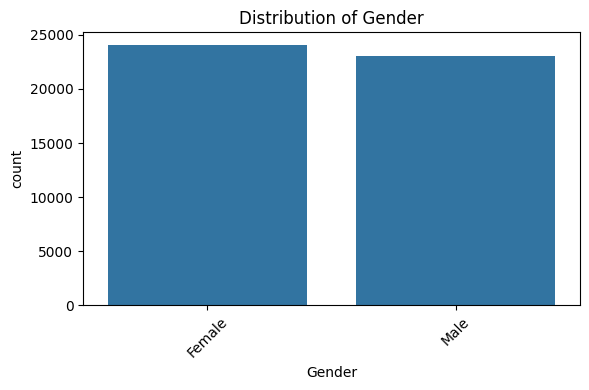

In [ ]:
analyze_categorical_column(df, 'Gender')



 Value Counts for: Preferred_Learning_Style
Preferred_Learning_Style
Visual             19826
Auditory           11673
Reading/Writing     9508
Kinesthetic         6095
Name: count, dtype: int64


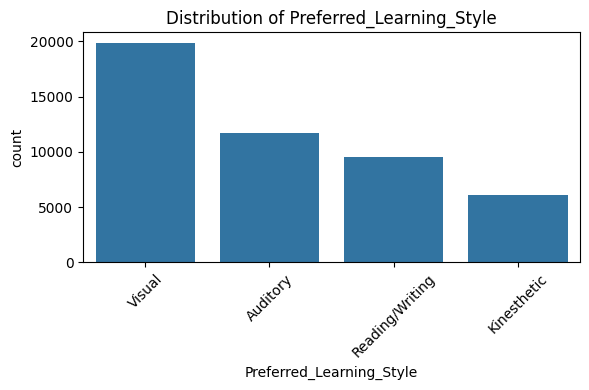

In [ ]:
analyze_categorical_column(df, 'Preferred_Learning_Style')


In [ ]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')


 Value Counts for: Use_of_Educational_Tech
Use_of_Educational_Tech
Yes    35354
No     11748
Name: count, dtype: int64


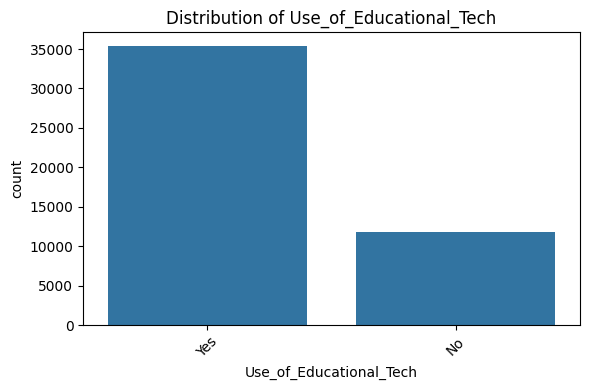

In [ ]:
analyze_categorical_column(df, 'Use_of_Educational_Tech')



 Value Counts for: Participation_in_Discussions
Participation_in_Discussions
Yes    32856
No     14246
Name: count, dtype: int64


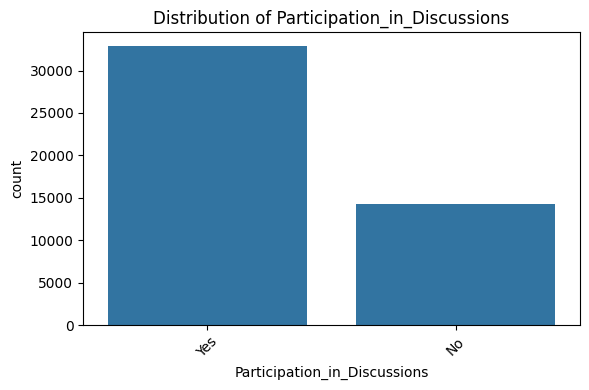

In [ ]:
analyze_categorical_column(df, 'Participation_in_Discussions')



 Value Counts for: Self_Reported_Stress_Level
Self_Reported_Stress_Level
3.000000     21150
4.000000     10193
2.000000      8102
5.000000      4262
1.000000      3241
14.830149       73
9.886766        30
19.773532       28
24.716914       14
4.943383         9
Name: count, dtype: int64


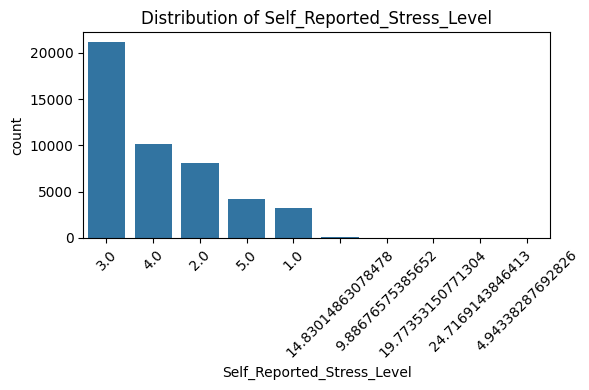

In [ ]:
analyze_categorical_column(df, 'Self_Reported_Stress_Level')


 Value Counts for: Final_Grade
Final_Grade
C    19763
B    19322
D     3346
A     2775
F     1896
Name: count, dtype: int64


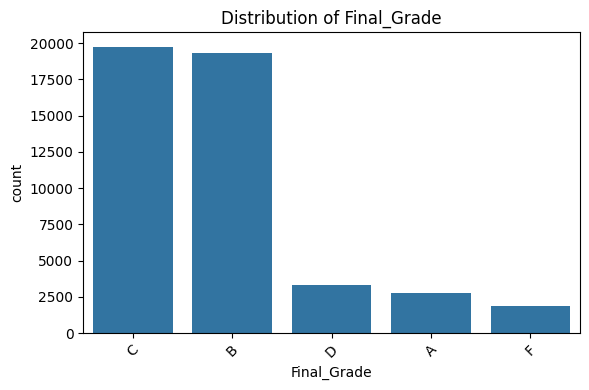

In [ ]:
analyze_categorical_column(df, 'Final_Grade')

In [ ]:
df.dtypes

,0
Student_ID,object
Age,float64
Gender,object
Study_Hours_per_Week,int64
Preferred_Learning_Style,object
Online_Courses_Completed,int64
Participation_in_Discussions,object
Assignment_Completion_Rate (%),int64
Exam_Score (%),int64
Attendance_Rate (%),int64


In [ ]:

def plot_numeric_distributions(df, columns, bins=30):
    n = len(columns)
    n_cols = 2
    n_rows = (n + 1) // n_cols
    plt.figure(figsize=(n_cols * 7, n_rows * 4))

    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col].dropna(), bins=bins, kde=True)
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.grid(True)

    plt.tight_layout()
    plt.show()


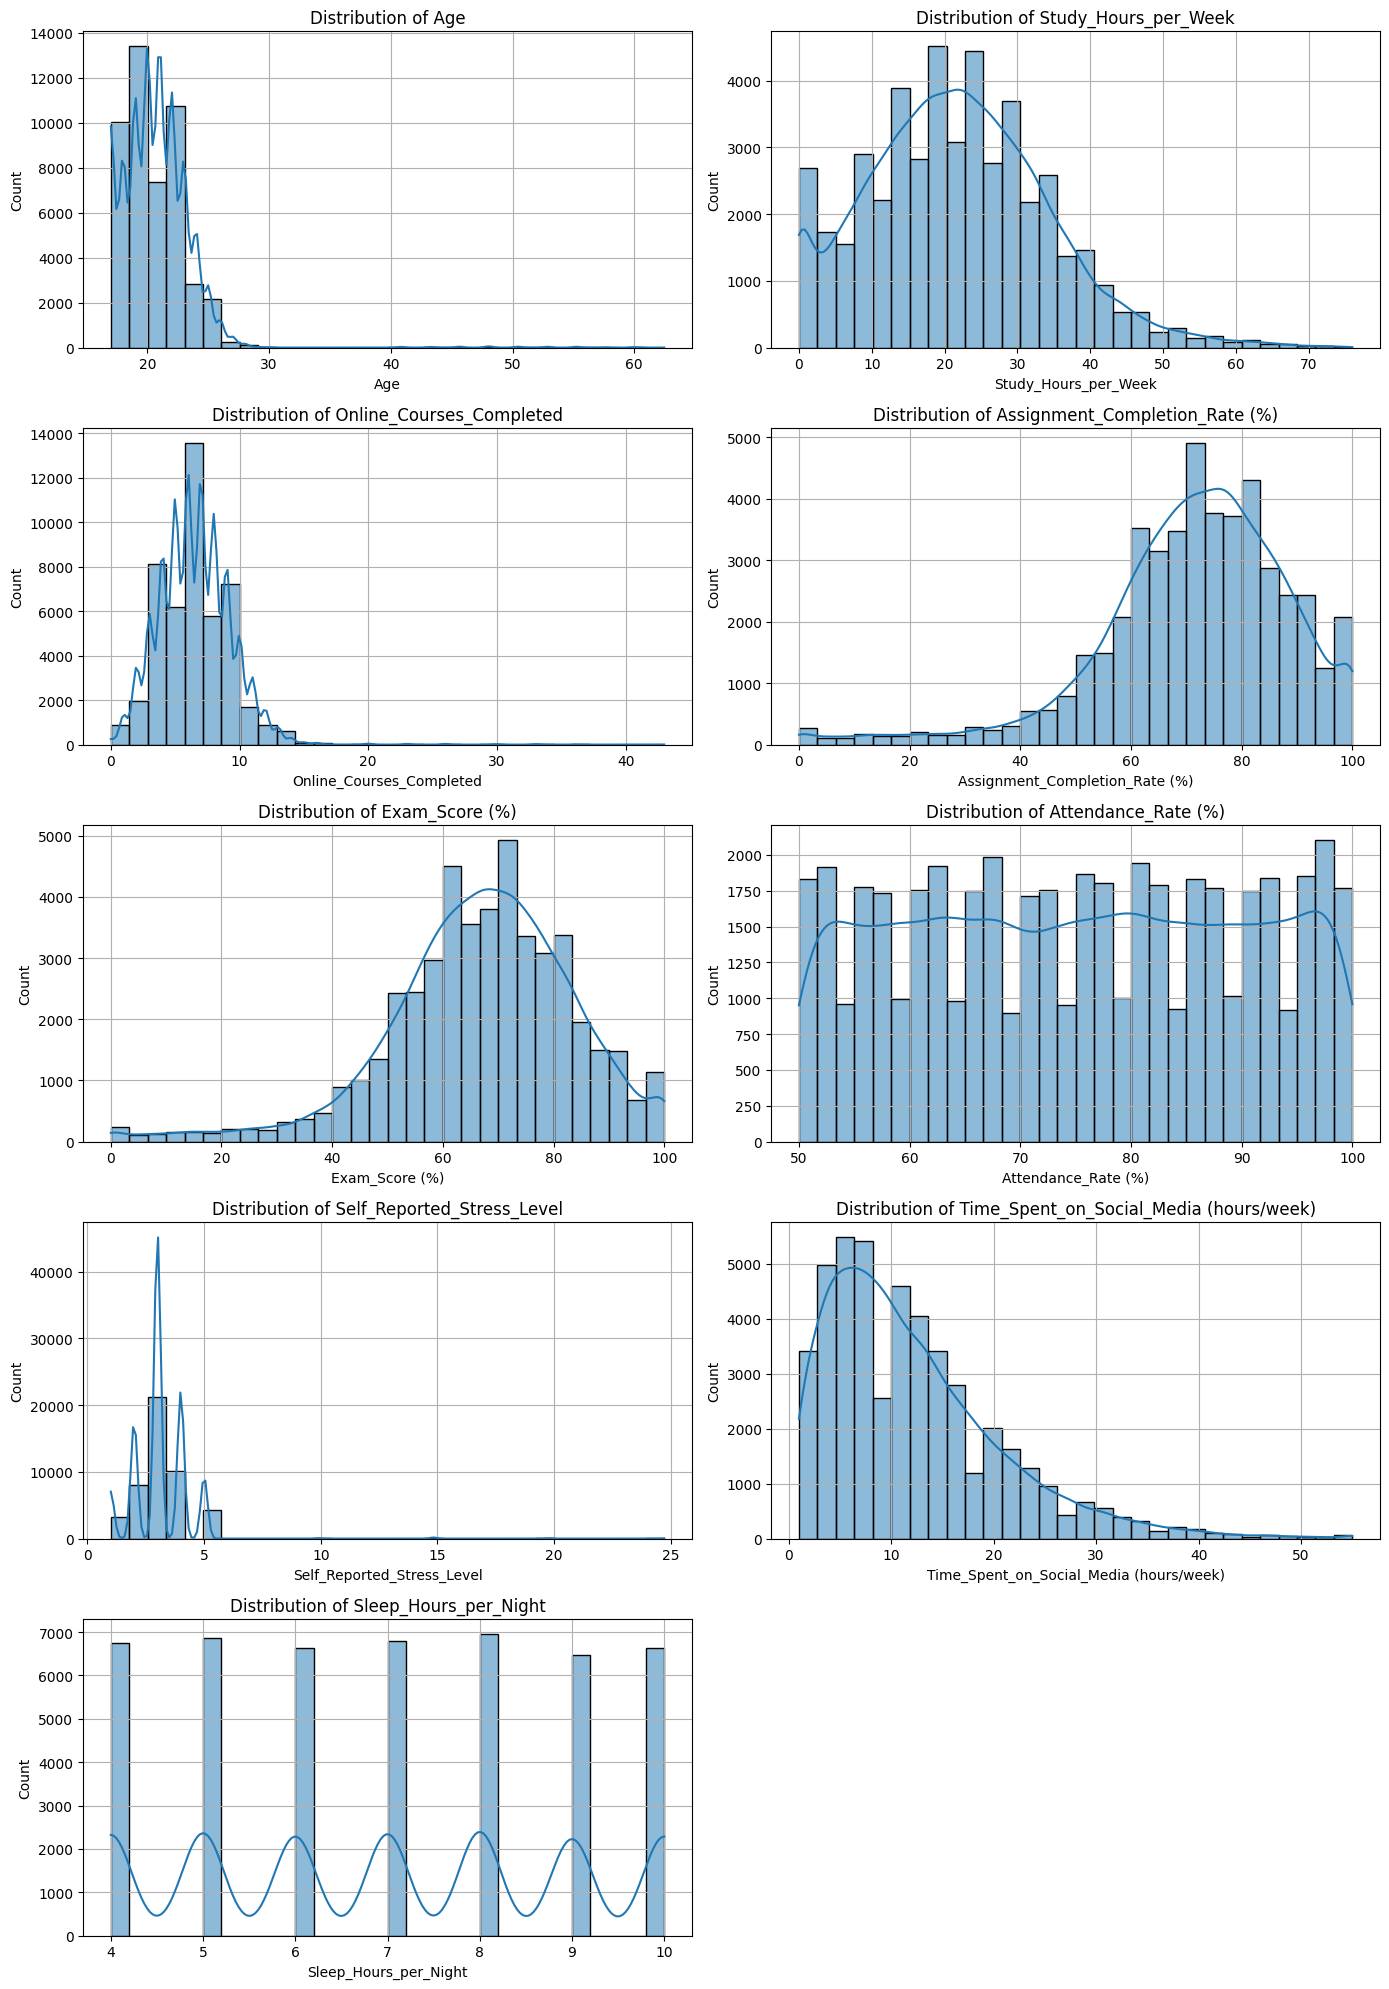

In [ ]:
numeric_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'Student_ID']
plot_numeric_distributions(df, numeric_columns)

In [ ]:
columns_to_convert = [
    'Study_Hours_per_Week',
    'Online_Courses_Completed',
    'Sleep_Hours_per_Night'
]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


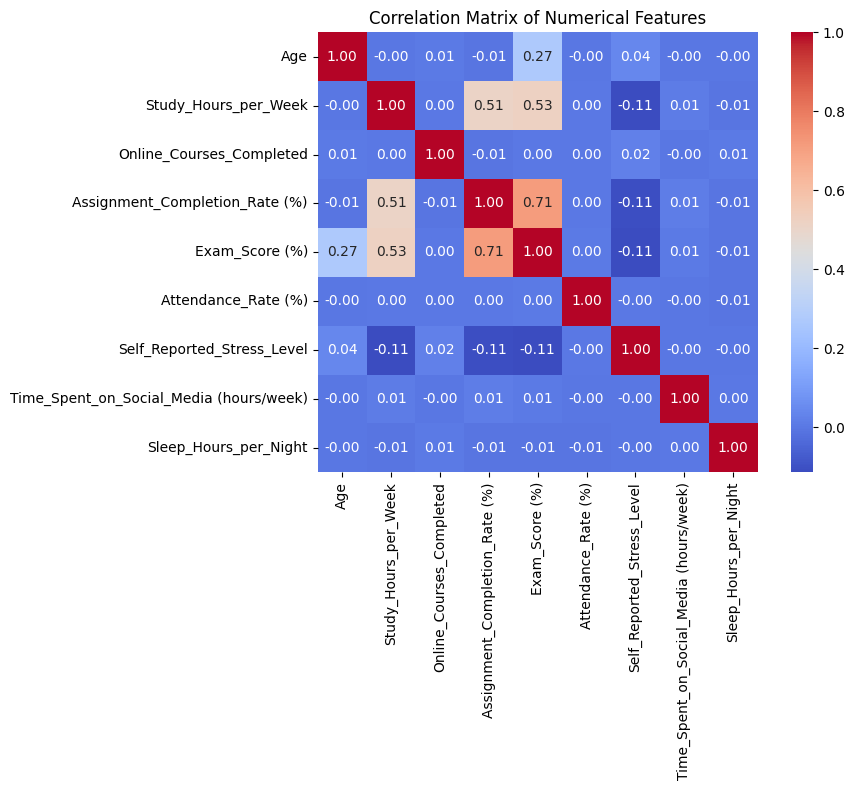

In [ ]:



import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64',])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


In [ ]:
df.isnull().sum().sort_values(ascending=False)



,0
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


In [ ]:
df_encoded = df.copy()

grade_map = {'D': 1, 'C': 2, 'B': 3, 'A': 4}
df_encoded['Final_Grade_Num'] = df_encoded['Final_Grade'].map(grade_map)

columns_to_convert = [
    'Study_Hours_per_Week',
    'Online_Courses_Completed',
    'Sleep_Hours_per_Night'
]
for col in columns_to_convert:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')

numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])
correlations = numeric_df.corr()['Final_Grade_Num'].sort_values(ascending=False)
print(correlations)


Final_Grade_Num                            1.000000
Exam_Score (%)                             0.584927
Assignment_Completion_Rate (%)             0.572783
Study_Hours_per_Week                       0.504707
Time_Spent_on_Social_Media (hours/week)    0.012832
Attendance_Rate (%)                        0.006478
Online_Courses_Completed                   0.002920
Age                                       -0.003978
Sleep_Hours_per_Night                     -0.005280
Self_Reported_Stress_Level                -0.236488
Name: Final_Grade_Num, dtype: float64


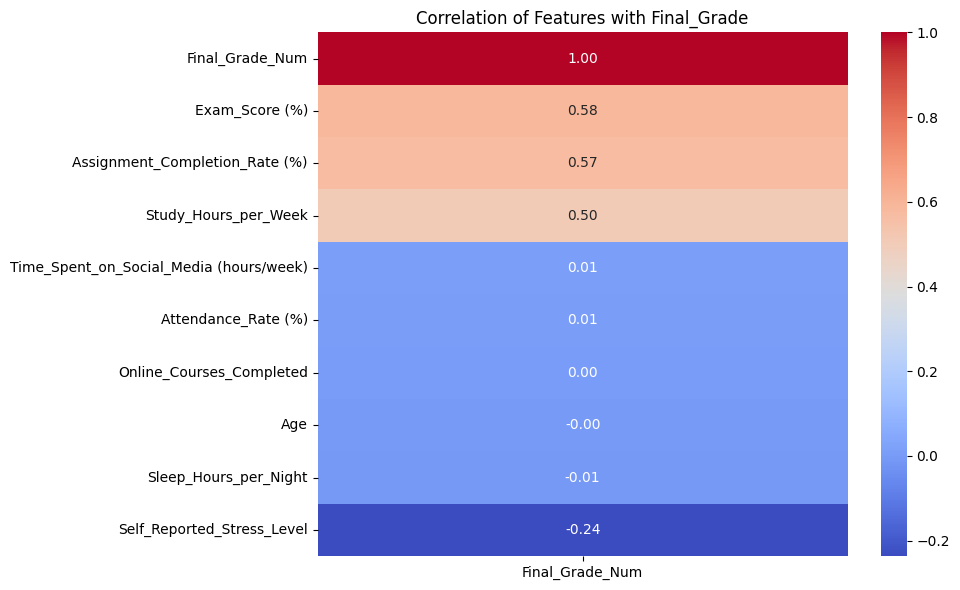

In [ ]:
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

grade_map = { 'D': 1, 'C': 2, 'B': 3, 'A': 4}
df['Final_Grade_Num'] = df['Final_Grade'].map(grade_map)

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Final_Grade_Num']].sort_values(by='Final_Grade_Num', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Features with Final_Grade")
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
Final_Grade_Num,1896
Student_ID,0
Gender,0
Age,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Study_Hours_per_Week,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
Final_Grade_Num,1896
Student_ID,0
Gender,0
Age,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Study_Hours_per_Week,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0


In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: Found {len(outliers)} outliers")
    return outliers


In [ ]:
detect_outliers_iqr(df, 'Time_Spent_on_Social_Media (hours/week)')


Time_Spent_on_Social_Media (hours/week): Found 1686 outliers


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num
1,S0002,20.0,Male,9,Reading/Writing,4,Yes,68,72,57,Yes,5.0,35,8,D,1.0
12,S0013,17.0,Female,16,Visual,9,Yes,68,46,51,Yes,4.0,33,6,C,2.0
20,S0021,20.0,Male,35,Auditory,10,No,67,57,82,Yes,2.0,38,9,C,2.0
47,S0048,19.0,Female,10,Visual,9,Yes,4,24,71,Yes,3.0,37,6,F,NaN
56,S0057,18.0,Male,24,Visual,10,Yes,81,61,75,Yes,5.0,32,4,B,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46932,S46933,20.0,Female,0,Auditory,3,Yes,47,36,72,No,3.0,34,10,D,1.0
46988,S46989,21.0,Male,24,Kinesthetic,33,Yes,64,59,68,Yes,4.0,39,7,C,2.0
47007,S47008,22.0,Female,38,Kinesthetic,9,Yes,100,78,56,Yes,2.0,32,4,B,3.0
47009,S47010,19.0,Male,10,Kinesthetic,5,No,74,81,94,Yes,3.0,35,7,B,3.0


In [ ]:
detect_outliers_iqr(df,'Online_Courses_Completed')

Online_Courses_Completed: Found 937 outliers


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num
67,S0068,24.0,Male,26,Reading/Writing,13,Yes,79,87,72,Yes,2.0,19,5,B,3.0
144,S0145,18.0,Female,24,Kinesthetic,13,Yes,76,55,51,No,2.0,5,10,C,2.0
240,S0241,18.0,Female,23,Reading/Writing,16,Yes,98,71,99,Yes,3.0,11,9,B,3.0
319,S0320,17.0,Female,24,Kinesthetic,13,No,52,52,84,Yes,4.0,3,4,C,2.0
338,S0339,19.0,Male,19,Auditory,13,No,67,53,50,Yes,5.0,11,9,C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47061,S47062,20.0,Female,24,Visual,33,No,79,70,92,Yes,4.0,10,8,B,3.0
47072,S47073,18.0,Male,25,Auditory,30,Yes,78,81,67,Yes,1.0,5,8,A,4.0
47083,S47084,18.0,Female,30,Visual,13,No,85,72,93,No,3.0,11,5,B,3.0
47094,S47095,20.0,Male,18,Visual,0,No,67,82,99,No,3.0,6,9,B,3.0


In [ ]:
detect_outliers_iqr(df,'Study_Hours_per_Week')

Study_Hours_per_Week: Found 528 outliers


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num
323,S0324,24.0,Male,68,Kinesthetic,7,Yes,87,92,56,Yes,4.000000,28,5,F,NaN
389,S0390,22.0,Female,68,Auditory,8,No,91,94,72,No,3.000000,7,10,A,4.0
498,S0499,19.0,Male,61,Auditory,1,Yes,93,90,59,Yes,5.000000,19,9,C,2.0
617,S0618,20.0,Male,56,Auditory,5,Yes,94,95,91,Yes,2.000000,6,10,A,4.0
725,S0726,21.0,Male,60,Visual,2,No,100,85,92,No,5.000000,11,6,C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46421,S46422,22.0,Female,66,Kinesthetic,6,Yes,100,94,86,Yes,4.000000,7,5,A,4.0
46584,S46585,23.0,Female,56,Visual,8,Yes,83,77,57,Yes,4.000000,4,5,A,4.0
46632,S46633,22.0,Male,59,Visual,11,No,93,91,96,Yes,3.000000,6,10,C,2.0
46847,S46848,23.0,Male,67,Visual,8,Yes,81,100,59,Yes,14.830149,13,6,B,3.0


In [ ]:
df.columns


Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade', 'Final_Grade_Num'],
      dtype='object')

In [ ]:
detect_outliers_iqr(df,'Assignment_Completion_Rate (%)')

Assignment_Completion_Rate (%): Found 1548 outliers


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num
47,S0048,19.0,Female,10,Visual,9,Yes,4,24,71,Yes,3.0,37,6,F,NaN
84,S0085,21.0,Female,6,Reading/Writing,8,Yes,28,19,87,Yes,3.0,24,7,F,NaN
87,S0088,20.0,Male,10,Auditory,5,Yes,26,29,87,Yes,4.0,8,5,F,NaN
114,S0115,18.0,Female,0,Auditory,1,Yes,24,0,79,Yes,2.0,17,8,F,NaN
145,S0146,22.0,Male,1,Visual,7,Yes,24,43,57,Yes,3.0,9,9,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46962,S46963,25.0,Female,26,Auditory,2,No,29,50,58,Yes,4.0,4,4,D,1.0
46981,S46982,23.0,Female,10,Auditory,13,Yes,13,28,70,Yes,3.0,9,6,F,NaN
47004,S47005,20.0,Male,15,Visual,5,Yes,0,19,74,Yes,3.0,12,8,C,2.0
47025,S47026,19.0,Male,5,Visual,10,Yes,0,17,59,Yes,5.0,12,8,F,NaN


In [ ]:
detect_outliers_iqr(df,'Exam_Score (%)')

Exam_Score (%): Found 1371 outliers


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num
47,S0048,19.0,Female,10,Visual,9,Yes,4,24,71,Yes,3.0,37,6,F,NaN
79,S0080,19.0,Male,8,Visual,7,Yes,42,0,92,Yes,2.0,19,8,F,NaN
84,S0085,21.0,Female,6,Reading/Writing,8,Yes,28,19,87,Yes,3.0,24,7,F,NaN
103,S0104,17.0,Male,10,Auditory,4,Yes,42,0,51,Yes,2.0,8,4,D,1.0
114,S0115,18.0,Female,0,Auditory,1,Yes,24,0,79,Yes,2.0,17,8,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46873,S46874,19.0,Male,7,Visual,11,No,7,22,63,No,2.0,31,5,F,NaN
46912,S46913,21.0,Female,10,Reading/Writing,23,Yes,8,25,68,Yes,2.0,12,10,F,NaN
46993,S46994,25.0,Female,20,Auditory,6,Yes,42,23,55,Yes,4.0,6,9,F,NaN
47004,S47005,20.0,Male,15,Visual,5,Yes,0,19,74,Yes,3.0,12,8,C,2.0


In [ ]:
detect_outliers_iqr(df,'Attendance_Rate (%)')

Attendance_Rate (%): Found 0 outliers


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num


In [ ]:
# Self_Reported_Stress_Level
detect_outliers_iqr(df,'Self_Reported_Stress_Level')

Self_Reported_Stress_Level: Found 3386 outliers


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num
3,S0004,24.000000,Female,0,Visual,9,No,65,75,60,Yes,1.000000,3,10,C,2.0
24,S0025,21.000000,Female,32,Visual,11,Yes,76,70,50,Yes,1.000000,18,10,B,3.0
25,S0026,18.000000,Female,27,Kinesthetic,4,Yes,82,72,86,Yes,1.000000,6,9,B,3.0
41,S0042,20.000000,Male,32,Auditory,5,Yes,64,65,92,Yes,1.000000,4,5,C,2.0
58,S0059,23.000000,Female,10,Visual,10,No,64,64,77,Yes,1.000000,13,6,C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47056,S47057,45.640617,Female,15,Reading/Writing,6,Yes,86,89,89,Yes,1.000000,17,10,B,3.0
47065,S47066,21.000000,Female,44,Visual,8,Yes,83,90,96,Yes,9.886766,12,6,B,3.0
47067,S47068,21.000000,Male,6,Reading/Writing,8,Yes,72,78,93,Yes,1.000000,4,4,C,2.0
47068,S47069,21.000000,Female,0,Reading/Writing,9,No,68,62,80,No,19.773532,20,5,C,2.0


In [ ]:
detect_outliers_iqr(df,'Time_Spent_on_Social_Media (hours/week)')

Time_Spent_on_Social_Media (hours/week): Found 1686 outliers


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num
1,S0002,20.0,Male,9,Reading/Writing,4,Yes,68,72,57,Yes,5.0,35,8,D,1.0
12,S0013,17.0,Female,16,Visual,9,Yes,68,46,51,Yes,4.0,33,6,C,2.0
20,S0021,20.0,Male,35,Auditory,10,No,67,57,82,Yes,2.0,38,9,C,2.0
47,S0048,19.0,Female,10,Visual,9,Yes,4,24,71,Yes,3.0,37,6,F,NaN
56,S0057,18.0,Male,24,Visual,10,Yes,81,61,75,Yes,5.0,32,4,B,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46932,S46933,20.0,Female,0,Auditory,3,Yes,47,36,72,No,3.0,34,10,D,1.0
46988,S46989,21.0,Male,24,Kinesthetic,33,Yes,64,59,68,Yes,4.0,39,7,C,2.0
47007,S47008,22.0,Female,38,Kinesthetic,9,Yes,100,78,56,Yes,2.0,32,4,B,3.0
47009,S47010,19.0,Male,10,Kinesthetic,5,No,74,81,94,Yes,3.0,35,7,B,3.0


In [ ]:
detect_outliers_iqr(df,'Sleep_Hours_per_Night')

Sleep_Hours_per_Night: Found 0 outliers


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num


In [ ]:
df.select_dtypes(include=['int64', 'float64']).skew().sort_values(ascending=False)


,0
Self_Reported_Stress_Level,4.212089
Age,3.797192
Time_Spent_on_Social_Media (hours/week),1.318509
Online_Courses_Completed,1.011109
Study_Hours_per_Week,0.475941
Sleep_Hours_per_Night,0.010186
Attendance_Rate (%),-0.005805
Final_Grade_Num,-0.017731
Exam_Score (%),-0.820482
Assignment_Completion_Rate (%),-1.130022


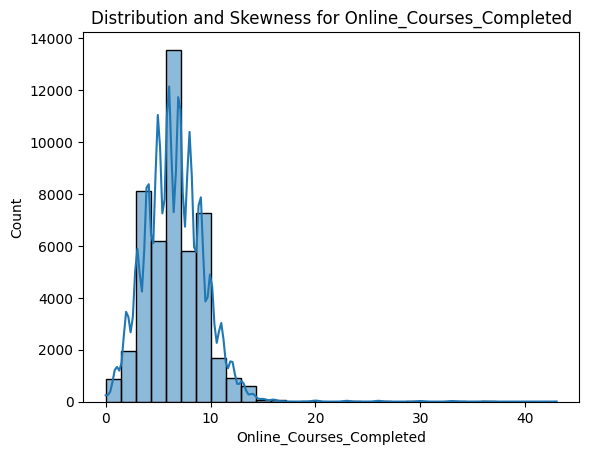

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'Online_Courses_Completed'
sns.histplot(df[col].dropna(), bins=30, kde=True)
plt.title(f'Distribution and Skewness for {col}')
plt.show()


In [ ]:
df['Final_Grade_Num'].unique()

array([ 3.,  1.,  2.,  4., nan])

# Preprocessing

# انشاء pipeline لازالة القيم غير المنطقية في الاعمدة المئوية التي تحوي قيم فوق 100%

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class PercentageRangeCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, min_val=0, max_val=100):
        self.columns = columns
        self.min_val = min_val
        self.max_val = max_val

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_clean = X.copy()
        for col in self.columns:
            X_clean = X_clean[(X_clean[col] >= self.min_val) & (X_clean[col] <= self.max_val)]
        return X_clean


In [ ]:
from sklearn.pipeline import Pipeline

percentage_columns = [
    'Exam_Score (%)',
    'Assignment_Completion_Rate (%)',
    'Attendance_Rate (%)'
]



In [ ]:
# invalid_percentage_rows = df_cleaned[
#     (df_cleaned['Exam_Score (%)'] > 100) |
#     (df_cleaned['Assignment_Completion_Rate (%)'] > 100) |
#     (df_cleaned['Attendance_Rate (%)'] > 100)
# ]

# invalid_percentage_rows

# pipeline لازالة القيم المتطرفة

In [ ]:
class OutlierRemoverIQR(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_clean = X.copy()
        for col in self.columns:
            Q1 = X_clean[col].quantile(0.25)
            Q3 = X_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            X_clean = X_clean[(X_clean[col] >= lower_bound) & (X_clean[col] <= upper_bound)]
        return X_clean


In [ ]:
df.isna().sum()

,0
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


# pipeline لملىء القيم الفارغة من قيم رقمية وقيم فئوية نعبئها باستخدام  الوسيط بالنسبة للاعمدة الرقمية والقيمة الاكثر تكرارا للاعمدة الفئوية

In [ ]:
class GroupMedianImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, group_col):
        self.columns = columns
        self.group_col = group_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        for col in self.columns:
            df[col] = df.groupby(self.group_col)[col].transform(lambda x: x.fillna(x.median()))
        return df



In [ ]:
class GroupModeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, group_col):
        self.columns = columns
        self.group_col = group_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        for col in self.columns:
            df[col] = df.groupby(self.group_col)[col].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
        return df



In [ ]:
percentage_columns = [
    'Exam_Score (%)',
    'Assignment_Completion_Rate (%)',
    'Attendance_Rate (%)',
    'Age',
    'Study_Hours_per_Week',

]

numeric_nulls = ['Study_Hours_per_Week', 'Online_Courses_Completed', 'Exam_Score (%)','Self_Reported_Stress_Level','Time_Spent_on_Social_Media (hours/week)']

categorical_nulls = ['Participation_in_Discussions', 'Sleep_Hours_per_Night', 'Final_Grade','Use_of_Educational_Tech','Preferred_Learning_Style']

categorical_features = ['Gender', 'Preferred_Learning_Style', 'Use_of_Educational_Tech',
                        'Participation_in_Discussions', 'Sleep_Hours_per_Night']

numeric_features = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed',
                    'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 'Attendance_Rate (%)',
                    'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)']



# تنفيذ ال pipline

In [ ]:


full_pipeline = Pipeline([
    ('remove_invalid_percentages', PercentageRangeCleaner(columns=percentage_columns)),
    ('remove_outliers', OutlierRemoverIQR(columns=percentage_columns)),
    ('fill_numeric_nulls', GroupMedianImputer(columns=numeric_nulls, group_col='Gender')),
    ('fill_categorical_nulls', GroupModeImputer(columns=categorical_nulls, group_col='Gender')),
])


In [ ]:
df_cleaned = full_pipeline.fit_transform(df)

In [ ]:
df_cleaned.isna().sum()

,0
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


# **بناء feature eng من خلال محاولة بناءا خصائص قد تساعد في عملية التصنيف النهائية**

# Engagement_Score تعبر عن مدى انخراط الطالب في العملية التدريسية

In [ ]:
df_cleaned['Engagement_Score'] = (
    0.4 * df_cleaned['Attendance_Rate (%)'] +
    0.4 * df_cleaned['Assignment_Completion_Rate (%)'] +
    0.2 * df_cleaned['Study_Hours_per_Week']
).round()


In [ ]:
df_cleaned['Engagement_Score'].describe()

,Engagement_Score
count,43855.000000
mean,63.731296
std,8.967884
min,35.000000
25%,57.000000
50%,64.000000
75%,70.000000
max,91.000000


In [ ]:
df_cleaned = df_cleaned[df_cleaned["Self_Reported_Stress_Level"].isin([1, 2, 3, 4, 5])]


In [ ]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,43731.0,20.527498,2.266216,17.0,19.0,20.0,22.0,26.0
Study_Hours_per_Week,43731.0,22.051474,11.363307,0.0,14.0,22.0,30.0,54.0
Online_Courses_Completed,43731.0,6.534426,2.757452,0.0,5.0,6.0,8.0,43.0
Assignment_Completion_Rate (%),43731.0,73.211452,13.529720,36.0,64.0,74.0,83.0,100.0
Exam_Score (%),43731.0,68.327022,13.710891,28.0,59.0,68.0,78.0,100.0
Attendance_Rate (%),43731.0,75.096979,14.748980,50.0,62.0,75.0,88.0,100.0
Self_Reported_Stress_Level,43731.0,3.090645,1.008343,1.0,3.0,3.0,4.0,5.0
Time_Spent_on_Social_Media (hours/week),43731.0,12.168210,8.658966,1.0,6.0,10.0,17.0,55.0
Sleep_Hours_per_Night,43731.0,6.983559,1.996264,4.0,5.0,7.0,9.0,10.0
Final_Grade_Num,43291.0,2.470860,0.701778,1.0,2.0,2.0,3.0,4.0


In [ ]:
df_cleaned

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Num,Engagement_Score
0,S0001,22.0,Male,27,Visual,6,No,95,79,66,No,3.0,12,8,B,3.0,70.0
1,S0002,20.0,Male,9,Reading/Writing,4,Yes,68,72,57,Yes,5.0,35,8,D,1.0,52.0
2,S0003,22.0,Female,24,Auditory,6,Yes,57,71,79,No,3.0,3,7,C,2.0,59.0
3,S0004,24.0,Female,0,Visual,9,No,65,75,60,Yes,1.0,3,10,C,2.0,50.0
4,S0005,20.0,Male,53,Visual,4,No,89,96,93,Yes,3.0,4,8,C,2.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47097,S47098,21.0,Female,23,Kinesthetic,9,Yes,77,59,70,Yes,5.0,23,4,C,2.0,63.0
47098,S47099,19.0,Male,20,Reading/Writing,5,No,69,60,100,Yes,3.0,15,4,C,2.0,72.0
47099,S47100,19.0,Male,18,Visual,5,Yes,59,41,90,No,3.0,5,5,C,2.0,63.0
47100,S47101,21.0,Female,13,Auditory,33,Yes,65,70,94,Yes,4.0,14,4,B,3.0,66.0


# **تعبر عن مدى تشتت الطالب **

In [ ]:
df_cleaned['Distraction_Index'] = (df_cleaned['Time_Spent_on_Social_Media (hours/week)'] / (df_cleaned['Study_Hours_per_Week'] + 1)).round(2)
df_cleaned['Distraction_Index']


,Distraction_Index
0,0.43
1,3.50
2,0.12
3,3.00
4,0.07
...,...
47097,0.96
47098,0.71
47099,0.26
47100,1.00


# تعبر عن مدى جودة الدراسة التي يقوم بها الطالب

In [ ]:
df_cleaned['Study_Efficiency'] = (df_cleaned['Exam_Score (%)'] / (df_cleaned['Study_Hours_per_Week'] + 1)).round(2)
df_cleaned['Study_Efficiency']

,Study_Efficiency
0,2.82
1,7.20
2,2.84
3,75.00
4,1.78
...,...
47097,2.46
47098,2.86
47099,2.16
47100,5.00


# دراسة ارتباط السمات التي انشاءت مع العمود الهدف

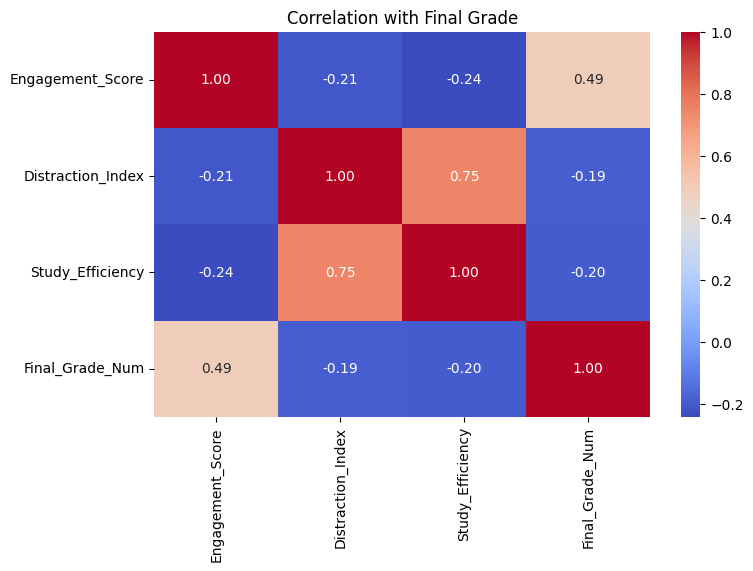

,Final_Grade_Num
Final_Grade_Num,1.000000
Engagement_Score,0.487316
Distraction_Index,-0.192825
Study_Efficiency,-0.198376


In [ ]:
correlations = df_cleaned[['Engagement_Score', 'Distraction_Index', 'Study_Efficiency', 'Final_Grade_Num']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation with Final Grade")
plt.show()

correlations['Final_Grade_Num'].sort_values(ascending=False)


# لاحظت عدم ارتباط بين العمدة التالية فقمنا بحذفها

In [ ]:
df_cleaned = df_cleaned.drop(columns=['Distraction_Index'])
df_cleaned = df_cleaned.drop(columns=['Study_Efficiency'])


# pipeline للقيم الرقمية التي لها ارتباط مع السمة الهدف لتخفيف الانحياز

In [ ]:
import numpy as np
class LogPip(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()



        df['Age_log'] = np.log1p(df['Age'])
        df['Self_Reported_Stress_Level_log'] = np.log1p(df['Self_Reported_Stress_Level'])
        df['Online_Courses_Completed'] = np.log1p(df['Study_Hours_per_Week'])

        return df

feature_engineer = LogPip()
df_cleaned = feature_engineer.fit_transform(df_cleaned)



In [ ]:
df_cleaned.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade', 'Final_Grade_Num',
       'Engagement_Score', 'Age_log', 'Self_Reported_Stress_Level_log'],
      dtype='object')

In [ ]:
df_cleaned['Student_ID']

,Student_ID
0,S0001
1,S0002
2,S0003
3,S0004
4,S0005
...,...
47097,S47098
47098,S47099
47099,S47100
47100,S47101


In [ ]:
df_cleaned.to_csv("data_afterpro.csv", index=False)


In [ ]:
df_cleaned.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade', 'Final_Grade_Num',
       'Engagement_Score', 'Age_log', 'Self_Reported_Stress_Level_log'],
      dtype='object')

In [ ]:
# ignore_columns = ['Student_ID','Final_Grade_Num']
# df_cleaned = df_cleaned.drop(columns=ignore_columns, errors='ignore')

In [ ]:
numerical_cols = [
    'Age', 'Study_Hours_per_Week', 'Online_Courses_Completed',
     'Assignment_Completion_Rate (%)',
    'Exam_Score (%)', 'Attendance_Rate (%)',
    'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night',
    'Engagement_Score', 'Age_log',
    'Self_Reported_Stress_Level'
]

categorical_cols = [
    'Gender', 'Preferred_Learning_Style', 'Use_of_Educational_Tech','Participation_in_Discussions',
]


# pipeline لتطبيق standard scaler , one hot على السمات

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def build_preprocessing_pipeline(numerical_features, categorical_features):
    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    return preprocessor


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.9 MB/s eta 0:00:00


# بناء دالة للتعميم بحيث نقوم بارسال لها الاعمدة التي نريد ان نقوم بالتنبؤ على اساسها وارسال الموجيل الذي نريد تطبيقه وتاخذ الداتا وداخلها pipeline يطبق preprocess , classification

In [ ]:
import time
from sklearn.metrics import accuracy_score, f1_score, classification_report

def build_baseline_model(df, target_column, numerical_features, categorical_features, model):
    X = df[numerical_features + categorical_features]
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    preprocessor = build_preprocessing_pipeline(numerical_features, categorical_features)

    clf_pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    start_train = time.time()
    clf_pipeline.fit(X_train, y_train)
    train_time = time.time() - start_train

    start_pred = time.time()
    y_pred = clf_pipeline.predict(X_test)
    predict_time = time.time() - start_pred

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    print(" Classification Report:\n")
    print(classification_report(y_test, y_pred))

    print(f" Train Time: {train_time:.2f} seconds")
    print(f" Predict Time: {predict_time:.2f} seconds")
    print(f" Accuracy: {acc:.4f}")
    print(f" F1 Macro: {f1_macro:.4f}")
    print(f" F1 Weighted: {f1_weighted:.4f}")

    return clf_pipeline, X_test, y_test, y_pred, {
        "accuracy": acc,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "train_time": train_time,
        "predict_time": predict_time
    }


In [ ]:
!pip install optuna

# تجربة logistic regression ك base line

In [ ]:
baseline_model = build_baseline_model(
    df=df_cleaned,
    target_column='Final_Grade',
    numerical_features=numerical_cols,
    categorical_features=categorical_cols,
    model=LogisticRegression(class_weight='balanced', max_iter=1000, solver='lbfgs', random_state=42)
)


 Classification Report:

              precision    recall  f1-score   support

           A       0.31      0.77      0.44       457
           B       0.81      0.59      0.69      3761
           C       0.76      0.44      0.56      3844
           D       0.33      0.73      0.46       597
           F       0.02      0.23      0.03        88

    accuracy                           0.54      8747
   macro avg       0.45      0.55      0.43      8747
weighted avg       0.72      0.54      0.59      8747

 Train Time: 4.83 seconds
 Predict Time: 0.03 seconds
 Accuracy: 0.5414
 F1 Macro: 0.4345
 F1 Weighted: 0.5949


# تجربة random forest مع optuna من اجل ال tuning لايجاد افضل parameters

In [ ]:
def optimize_random_forest_with_optuna(X, y, numerical_cols, categorical_cols, n_trials=30):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "max_depth": trial.suggest_int("max_depth", 5, 30),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
            "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
            "class_weight": "balanced",
            "random_state": 42
        }

        model = RandomForestClassifier(**params)
        preprocessor = build_preprocessing_pipeline(numerical_cols, categorical_cols)

        pipeline = Pipeline([
            ("preprocessing", preprocessor),
            ("classifier", model)
        ])

        scores = cross_val_score(
            pipeline, X, y,
            cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
            scoring="f1_macro"
        )

        return scores.mean()

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    return study


In [ ]:
grade_map = { 'F':0,'D': 1, 'C': 2, 'B': 3, 'A': 4}
df_cleaned['Final_Grade_Num'] = df_cleaned['Final_Grade'].map(grade_map)


In [ ]:
df_cleaned['Final_Grade_Num'].isna().sum()

np.int64(0)

In [ ]:
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned["Final_Grade_Num"]

rf_study = optimize_random_forest_with_optuna(X, y, numerical_cols, categorical_cols, n_trials=30)

print("Best params:", rf_study.best_params)
print("Best f1_macro:", rf_study.best_value)


[I 2025-07-14 18:20:21,739] A new study created in memory with name: no-name-397417a9-ebaa-446e-a800-1d6c0a7fcbe4
[I 2025-07-14 18:21:08,048] Trial 0 finished with value: 0.6125313686433908 and parameters: {'n_estimators': 340, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.6125313686433908.
[I 2025-07-14 18:22:06,679] Trial 1 finished with value: 0.6207293097639405 and parameters: {'n_estimators': 494, 'max_depth': 28, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.6207293097639405.
[I 2025-07-14 18:22:31,908] Trial 2 finished with value: 0.621538716126249 and parameters: {'n_estimators': 225, 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.621538716126249.
[I 2025-07-14 18:23:21,601] Trial 3 finished with value: 0.6196809933531068 and parameters: {'n_estimators': 426, 'max_depth': 20, 'mi

Best params: {'n_estimators': 233, 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}
Best f1_macro: 0.6219798676049276


In [ ]:
{'n_estimators': 260, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}

{'n_estimators': 260,
 'max_depth': 27,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt'}

# **تطبييق random forest بعد ايجاد افضل  البارمترات  وايجاد افضل دقة**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    n_estimators= 260,
 max_depth=27,
 min_samples_split= 5,
 min_samples_leaf= 2,
 max_features = 'sqrt',
    class_weight='balanced',
    random_state=42
)


In [ ]:
model_rf = build_baseline_model(
    df=df_cleaned,
    target_column='Final_Grade_Num',
    numerical_features=numerical_cols,
    categorical_features=categorical_cols,
    model=best_rf
)


 Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.01      0.02        88
           1       0.75      0.71      0.73       597
           2       0.84      0.86      0.85      3844
           3       0.84      0.85      0.84      3761
           4       0.73      0.65      0.69       457

    accuracy                           0.83      8747
   macro avg       0.73      0.61      0.62      8747
weighted avg       0.82      0.83      0.82      8747

 Train Time: 26.68 seconds
 Predict Time: 0.51 seconds
 Accuracy: 0.8251
 F1 Macro: 0.6248
 F1 Weighted: 0.8203


In [ ]:
!pip install xgboost optuna


# متل ماعملنا مع  random forest قمت بعملية tuning على xgboost

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier

def optimize_xgboost_with_optuna(X, y, numerical_cols, categorical_cols, n_trials=30):
    def objective(trial):
        # معاملات XGBoost التي سيتم اختبارها
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "gamma": trial.suggest_float("gamma", 0, 5),
            "reg_alpha": trial.suggest_float("reg_alpha", 0, 1),
            "reg_lambda": trial.suggest_float("reg_lambda", 0, 1),
            "random_state": 42,
            "use_label_encoder": False,
            "eval_metric": "mlogloss"
        }

        preprocessor = build_preprocessing_pipeline(numerical_cols, categorical_cols)
        model = XGBClassifier(**params)
        clf_pipeline = Pipeline([
            ("preprocessing", preprocessor),
            ("classifier", model)
        ])

        scores = cross_val_score(clf_pipeline, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                 scoring="f1_macro")
        return scores.mean()

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    return study


In [ ]:
y = df_cleaned["Final_Grade_Num"]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_cleaned["Final_Grade"])


In [ ]:
# df_cleaned["Final_Grade_Num"] = df_cleaned["Final_Grade_Num"].astype(int) - 1


In [ ]:
df_cleaned["Final_Grade_Num"]

,Final_Grade_Num
0,3
1,1
2,2
3,2
4,2
...,...
47097,2
47098,2
47099,2
47100,3


In [ ]:
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned["Final_Grade_Num"]
study = optimize_xgboost_with_optuna(X, y, numerical_cols, categorical_cols, n_trials=30)
print("Best params:", study.best_params)
print("Best f1_macro:", study.best_value)


NameError: name 'optimize_xgboost_with_optuna' is not defined

In [ ]:
# 'n_estimators': 254, 'max_depth': 5, 'learning_rate': 0.1395303615248965, 'subsample': 0.8278075098149096, 'colsample_bytree': 0.7100505239833204, 'gamma': 1.0698135508188718, 'reg_alpha': 0.4212219997644035, 'reg_lambda': 0.7760871486089218

# تطبيق Xgboost على افضل parameters

In [ ]:
from xgboost import XGBClassifier

best_xgb = XGBClassifier(
    n_estimators=254,
    max_depth=5,
    learning_rate=0.1395303615248965,
    subsample=0.8278075098149096,
    colsample_bytree=0.7100505239833204,
    gamma=1.0698135508188718,
    reg_alpha= 0.4212219997644035,
    reg_lambda=0.7760871486089218,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [ ]:
xgb_model = build_baseline_model(
    df=df_cleaned,
    target_column='Final_Grade_Num',
    numerical_features=numerical_cols,
    categorical_features=categorical_cols,
    model=best_xgb
)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:36:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.06      0.10        88
           1       0.79      0.70      0.74       597
           2       0.85      0.88      0.86      3844
           3       0.85      0.87      0.86      3761
           4       0.77      0.65      0.71       457

    accuracy                           0.84      8747
   macro avg       0.78      0.63      0.66      8747
weighted avg       0.84      0.84      0.84      8747

 Train Time: 5.19 seconds
 Predict Time: 0.08 seconds
 Accuracy: 0.8425
 F1 Macro: 0.6556
 F1 Weighted: 0.8379


In [ ]:
!pip install catboost optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00


# بنفس الطريقة مع catboost

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

def optimize_catboost_with_optuna(X, y, numerical_cols, categorical_cols, n_trials=30):
    def objective(trial):
        params = {
            "iterations": trial.suggest_int("iterations", 200, 500),
            "depth": trial.suggest_int("depth", 4, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
            "random_strength": trial.suggest_float("random_strength", 1e-9, 10.0),
            "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
            # "task_type": "GPU",
            "verbose": 0,
            "random_state": 42
        }

        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42)

        scaler = StandardScaler()
        X_train_num = scaler.fit_transform(X_train[numerical_cols])
        X_val_num = scaler.transform(X_val[numerical_cols])

        import pandas as pd
        X_train_final = pd.DataFrame(X_train_num, columns=numerical_cols).join(X_train[categorical_cols].reset_index(drop=True))
        X_val_final = pd.DataFrame(X_val_num, columns=numerical_cols).join(X_val[categorical_cols].reset_index(drop=True))

        model = CatBoostClassifier(**params)
        model.fit(X_train_final, y_train, cat_features=categorical_cols, verbose=0)

        y_pred = model.predict(X_val_final)
        from sklearn.metrics import f1_score
        return f1_score(y_val, y_pred, average='macro')

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return study


In [ ]:
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned["Final_Grade_Num"]

catboost_study = optimize_catboost_with_optuna(X, y, numerical_cols, categorical_cols, n_trials=30)

print("Best params:", catboost_study.best_params)
print("Best f1_macro:", catboost_study.best_value)


[I 2025-07-14 12:55:06,672] A new study created in memory with name: no-name-b79652c6-5b69-46f9-8e5e-6b042cbd3bbc
[I 2025-07-14 12:55:24,710] Trial 0 finished with value: 0.6488999351121899 and parameters: {'iterations': 255, 'depth': 4, 'learning_rate': 0.2458058220328165, 'l2_leaf_reg': 3.250569872887923, 'random_strength': 5.174004671804511, 'bagging_temperature': 0.7369580781726291}. Best is trial 0 with value: 0.6488999351121899.
[I 2025-07-14 12:57:08,355] Trial 1 finished with value: 0.644560095311155 and parameters: {'iterations': 417, 'depth': 10, 'learning_rate': 0.1794163176595066, 'l2_leaf_reg': 3.11055438617885, 'random_strength': 3.9651864776419394, 'bagging_temperature': 0.5909866265862656}. Best is trial 0 with value: 0.6488999351121899.
[I 2025-07-14 12:58:03,757] Trial 2 finished with value: 0.6412337613182586 and parameters: {'iterations': 373, 'depth': 9, 'learning_rate': 0.03957650500835052, 'l2_leaf_reg': 6.659217049592457, 'random_strength': 5.341545931454296, 'b

Best params: {'iterations': 428, 'depth': 5, 'learning_rate': 0.2344237387338638, 'l2_leaf_reg': 7.6812368951468315, 'random_strength': 6.945177617128163, 'bagging_temperature': 0.17510470279526824}
Best f1_macro: 0.6611483741717497


In [ ]:
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned["Final_Grade_Num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_cols])
X_test_num = scaler.transform(X_test[numerical_cols])

X_train_final = pd.DataFrame(X_train_num, columns=numerical_cols).join(X_train[categorical_cols].reset_index(drop=True))
X_test_final = pd.DataFrame(X_test_num, columns=numerical_cols).join(X_test[categorical_cols].reset_index(drop=True))

# تدريب catboost على افضل parameters خرجت من optuna

In [ ]:
start_time = time.time()

final_catboost = CatBoostClassifier(
    iterations=200,
    depth=7,
    learning_rate=0.09854897980116652,
    l2_leaf_reg=7.706246736465394,
    random_strength=0.9197995589084104,
    bagging_temperature=0.07526610905850573,
    task_type="GPU",
    verbose=0,
    random_state=42
)

final_catboost.fit(X_train_final, y_train, cat_features=categorical_cols)
train_duration = time.time() - start_time
start_time = time.time()

y_pred = final_catboost.predict(X_test_final)
predict_duration = time.time() - start_time

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print(f" Train time : {train_duration:.2f} seconds")
print(f" Predict Time : {predict_duration:.2f} seconds")


Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.03      0.06        88
           1       0.78      0.71      0.74       597
           2       0.85      0.87      0.86      3844
           3       0.85      0.87      0.86      3761
           4       0.77      0.66      0.71       457

    accuracy                           0.84      8747
   macro avg       0.77      0.63      0.65      8747
weighted avg       0.84      0.84      0.84      8747

 Train time : 6.28 seconds
 Predict Time : 0.04 seconds


# لاحظت ان الموديل يفشل بسبب ان لدينا class imbalance قمنا بتطبيق balanced random forest من اجل حل مشكلة class imbalance من اجل ان تكون العينات متساوية
# مع تطبيق optuna من اجل ايجاد افضل parameters

In [ ]:
import optuna
from sklearn.metrics import f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def optimize_balanced_rf_with_optuna(X, y, numerical_cols, categorical_cols, n_trials=30):
    def objective(trial):
        # Hyperparameters to optimize
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 500),
            'max_depth': trial.suggest_int('max_depth',1 , 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
            'random_state': 42,
            'n_jobs': -1
        }

        model = BalancedRandomForestClassifier(**params)

        # Pipeline (preprocessing numeric and categorical separately)
        from sklearn.pipeline import Pipeline
        from sklearn.compose import ColumnTransformer
        from sklearn.preprocessing import OneHotEncoder, StandardScaler

        preprocessor = ColumnTransformer([
            ("num", StandardScaler(), numerical_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ])

        pipeline = Pipeline([
            ("preprocess", preprocessor),
            ("model", model)
        ])

        scores = cross_val_score(
            pipeline, X, y,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring="f1_macro"
        )
        return scores.mean()

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return study


In [ ]:
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned["Final_Grade_Num"]

study_rf_bal = optimize_balanced_rf_with_optuna(X, y, numerical_cols, categorical_cols, n_trials=30)

print("Best params:", study_rf_bal.best_params)
print("Best f1_macro:", study_rf_bal.best_value)


In [ ]:
{
    'n_estimators': 131,
    'max_depth': 17,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

best_bal_rf = BalancedRandomForestClassifier(
    n_estimators=131,
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

model_bal_rf = build_baseline_model(
    df=df_cleaned,
    target_column='Final_Grade_Num',
    numerical_features=numerical_cols,
    categorical_features=categorical_cols,
    model=best_bal_rf
)


# تطبيق stacking بنموذجين catboostb,balanced random forest مع تطبيق logistic regression ك مخرج

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

catboost_model = CatBoostClassifier(
    iterations=346,
    depth=5,
    learning_rate=0.268,
    l2_leaf_reg=1.93,
    random_strength=0.229,
    bagging_temperature=0.170,
    verbose=0,
    devices="0",
    random_state=42
)

balanced_rf_model = BalancedRandomForestClassifier(
    n_estimators=131,
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

meta_model = LogisticRegression(max_iter=1000)

stacking_model = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('balanced_rf', balanced_rf_model)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

stacking_pipeline = build_baseline_model(
    df=df_cleaned,
    target_column='Final_Grade_Num',
    numerical_features=numerical_cols,
    categorical_features=categorical_cols,
    model=stacking_model
)


 Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.06      0.10        88
           1       0.79      0.71      0.74       597
           2       0.84      0.88      0.86      3844
           3       0.85      0.86      0.86      3761
           4       0.78      0.68      0.73       457

    accuracy                           0.84      8747
   macro avg       0.76      0.64      0.66      8747
weighted avg       0.84      0.84      0.84      8747

 Train Time: 65.00 seconds
 Predict Time: 0.26 seconds
 Accuracy: 0.8412
 F1 Macro: 0.6583
 F1 Weighted: 0.8369


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y = df_cleaned["Final_Grade_Num"]
classes = np.unique(y)

class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights = {cls: weight for cls, weight in zip(classes, class_weights_array)}

print("Class Weights:", class_weights)


Class Weights: {np.int64(0): np.float64(19.877727272727274), np.int64(1): np.float64(2.9300502512562816), np.int64(2): np.float64(0.45508090951662417), np.int64(3): np.float64(0.4650997075245945), np.int64(4): np.float64(3.8326906222611745)}


# قمنا بتطبيق catboost wieghted الذي يقوم باسناد اوزان للفئات بناءا على تكرارها في الداتا محاولة لحل مشكلة class imbalance

In [ ]:
from catboost import CatBoostClassifier

catboost_weighted = CatBoostClassifier(
    iterations=346,
    depth=5,
    learning_rate=0.268,
    l2_leaf_reg=1.93,
    random_strength=0.229,
    bagging_temperature=0.170,
    verbose=0,
    task_type="GPU",
    class_weights=list(class_weights.values()),
    random_state=42
)


In [ ]:
model_cb_weighted = build_baseline_model(
    df=df_cleaned,
    target_column='Final_Grade_Num',
    numerical_features=numerical_cols,
    categorical_features=categorical_cols,
    model=catboost_weighted
)


 Classification Report:

              precision    recall  f1-score   support

           0       0.06      0.10      0.08        88
           1       0.63      0.81      0.71       597
           2       0.87      0.83      0.85      3844
           3       0.87      0.83      0.85      3761
           4       0.58      0.78      0.67       457

    accuracy                           0.82      8747
   macro avg       0.60      0.67      0.63      8747
weighted avg       0.83      0.82      0.82      8747

 Train Time: 9.76 seconds
 Predict Time: 0.35 seconds
 Accuracy: 0.8183
 F1 Macro: 0.6310
 F1 Weighted: 0.8237


# نطبيق under sampling من اجل حل مشكلة class imbalance fباستخدام SMote
# قمنا بتطبيق باستخدام افضل موديل وهو CATBoost

In [ ]:
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned["Final_Grade_Num"]



In [ ]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [ ]:
noisy_preprocessor_fixed = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, [col for col in numerical_cols if col in X.columns]),
        ("cat", categorical_transformer, [col for col in categorical_cols if col in X.columns])
    ]
)



In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
start_time = time.time()


smote_pipeline = ImbPipeline(steps=[
    ("preprocessor", noisy_preprocessor_fixed),
    ("smote", SMOTE(random_state=42)),
    ("classifier", CatBoostClassifier(
    iterations=346,
    depth=5,
    learning_rate=0.268,
    l2_leaf_reg=1.93,
    random_strength=0.229,
    bagging_temperature=0.170,
    verbose=0,
    task_type="GPU",
    class_weights=list(class_weights.values()),
    random_state=42
))
])

smote_pipeline.fit(X, y)
train_duration = time.time() - start_time
start_time = time.time()



y_pred_smote = smote_pipeline.predict(X_test)
predict_duration = time.time() - start_time

print(classification_report(y_test, y_pred_smote, target_names=["F", "D", "C", "B", "A"]))


              precision    recall  f1-score   support

           F       0.12      0.98      0.22        88
           D       0.52      0.87      0.65       597
           C       0.89      0.72      0.79      3844
           B       0.89      0.72      0.80      3761
           A       0.45      0.90      0.60       457

    accuracy                           0.74      8747
   macro avg       0.58      0.84      0.61      8747
weighted avg       0.84      0.74      0.77      8747



# 6 مقارنة النتائج وتحليل الاداء

## مقارنة اداء النماذج

| النموذج                      | Accuracy | F1 Macro | F1 Weighted | وقت التدريب بالثواني | وقت التنبؤ بالثواني |
|-----------------------------|----------|----------|--------------|------------------------|----------------------|
| Logistic Regression         | 0.54   | 0.43  | 0.59       | 4.83                   | 0.03                 |
| Random Forest               | 0.82   | 0.62   | 0.82       | 26.68                  | 0.51                 |
| XGBoost                     | 0.84   | 0.65   | 0.83       | 5.19                   | 0.08                 |
| CatBoost                    | 0.84     | 0.65     | 0.84         | 6.28                   | 0.04                 |
| Balanced Random Forest      | 0.84   | 0.65   | 0.83       | 65.00                  | 0.26                 |
| CatBoost Weighted           | 0.81   | 0.63   | 0.82       | 9.76                   | 0.35                 |
| CatBoost مع SMOTE           | 0.74     | 0.61     | 0.77         |                 |           |



## خلاصة

اعلى دقة عامة ظهرت في XGBoost و CatBoost

افضل توازن بين الفئات ظهر في Balanced Random Forest و CatBoost Weighted

في حال كان الهدف الحصول على اعلى دقة ممكنة يمكن الاعتماد على XGBoost او CatBoost

وفي حال كان التركيز على تحسين استدعاء الفئات النادرة ينصح باستخدام النماذج التي تعتمد على الموازنة مثل balanced random forest او اضافة اوزان للفئات كما في CatBoost weighted
